# importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np

# Reading the data file

In [2]:
#reading csv file and displaying
df=pd.read_csv("data_hackathon.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# Level 0 analysis

# 1.Shape

In [3]:
df.shape

(10692, 13)

# 2.Null value counts

In [4]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# 3.Column names

In [5]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# 4. info of the data file

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


# 5.Seperating numerical and categorical data

In [7]:
# creating a user defined function for seperating numerical or categorical data
def seperate_data_types(df):
    categorical=[]
    numerical=[]
    for column in df.columns:
        if df[column].nunique()<100:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical,numerical
categorical,numerical=seperate_data_types(df)

# using tabulate to print the data
from tabulate import tabulate
table =[categorical,numerical]
print(tabulate({"categorical":categorical,"numerical":numerical},headers =["categorical","numerical"]))

categorical     numerical
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


here data is not in correct list hence we will remove and append it in correct list

In [8]:
categorical.remove("rooms")
numerical.append("rooms")

categorical.remove("bathroom")
numerical.append("bathroom")

categorical.remove("parking spaces")
numerical.append("parking spaces")

categorical.remove("floor")
numerical.append("floor")

In [9]:
categorical

['city', 'animal', 'furniture']

In [10]:
numerical

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor']

# Level 1 Analysis (Univariate analysis)

# 1.categorical data

In [11]:
# creating a user defined function  for calculating mode, null values and unique values
def info_of_cat(col):
    print(f"unique values in {col} are: {df[col].unique()}")
    print(f"mode of {col} is {df[col].mode()[0]}")
    print(f"number of missing values in {col} is {df[col].isnull().sum()}")
    if df[col].isnull().sum()>0:
        print(f"\n there are null values in the{col} columns")

In [12]:
info_of_cat("city")

unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
mode of city is São Paulo
number of missing values in city is 0


In [13]:
info_of_cat("animal")

unique values in animal are: ['acept' 'not acept']
mode of animal is acept
number of missing values in animal is 0


In [14]:
info_of_cat("furniture")

unique values in furniture are: ['furnished' 'not furnished']
mode of furniture is not furnished
number of missing values in furniture is 0


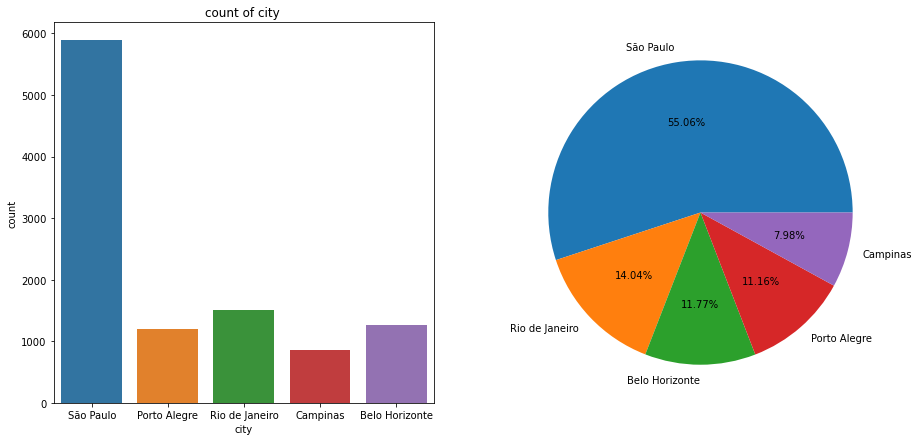

In [15]:
# graphs for city column using seaborn
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("count of city ")
# setting the title

percentage=df["city"].value_counts()
# counting the values 

labels=list(df["city"].value_counts().index)
# convert the index of the value counts into the list

sns.countplot(x=df["city"],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

around 5800 properties is in the city of sao Paulo

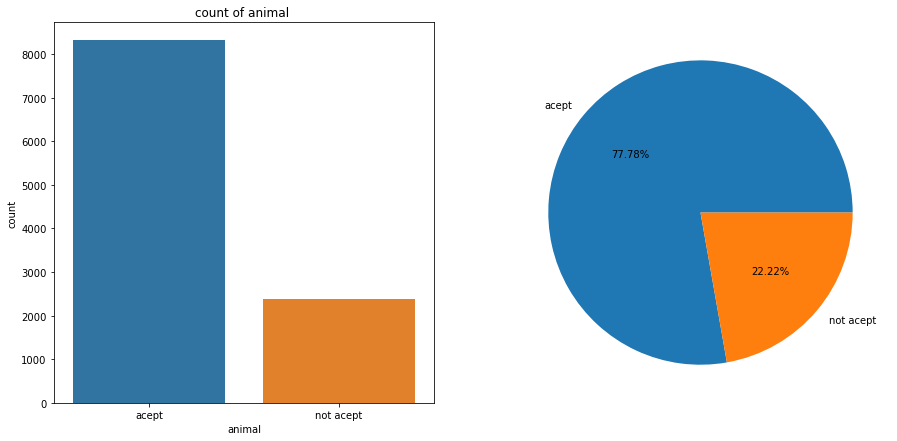

In [16]:
# graphs for animal column using seaborn
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("count of animal ")
# setting the title

percentage=df["animal"].value_counts()
# counting the values 

labels=list(df["animal"].value_counts().index)
# convert the index of the value counts into the list

sns.countplot(x=df["animal"],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

77% of properties accept the animal

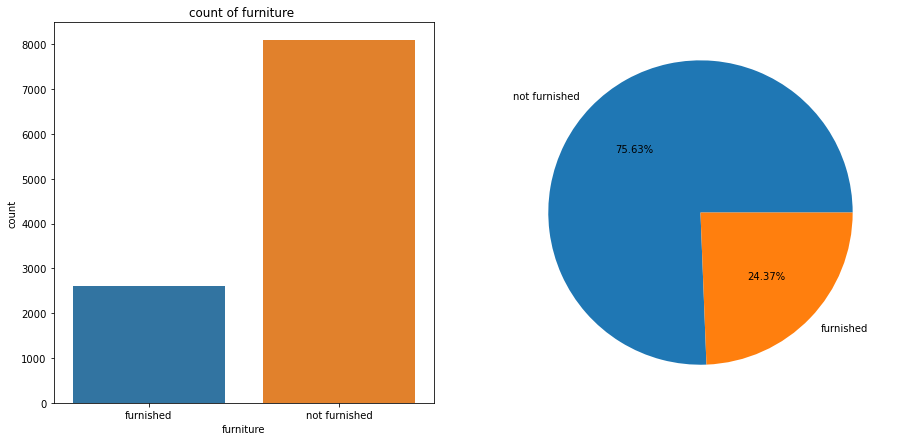

In [17]:
# graphs for furniture column using seaborn
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("count of furniture ")
# setting the title

percentage=df["furniture"].value_counts()
# counting the values 

labels=list(df["furniture"].value_counts().index)
# convert the index of the value counts into the list

sns.countplot(x=df["furniture"],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

onl;y 24.37 % of houses are fully furni|shed

# 2.Numerical columns

In [18]:
# creating a user defined function for numerical data
def info_of_numerical(col):
    print(f" the mean of {col} is {df[col].mean()}")
    print(f" the median of {col} is {df[col].median()}")
    print(f" the mode of {col} is {df[col].mode()}")
    print(f" the standard deviation of {col} is {df[col].std()}")
    print(f" the no of missing values for  {col} is {df[col].isnull().sum()}")

In [19]:
info_of_numerical("total (R$)")

 the mean of total (R$) is 5490.4869996258885
 the median of total (R$) is 3581.5
 the mode of total (R$) is 0    2555
dtype: int64
 the standard deviation of total (R$) is 16484.72591235027
 the no of missing values for  total (R$) is 0


In [20]:
info_of_numerical("floor")

 the mean of floor is 5.0679947624392065
 the median of floor is 3.0
 the mode of floor is 0    0
dtype: int64
 the standard deviation of floor is 6.069050243218268
 the no of missing values for  floor is 0


In [21]:
info_of_numerical("parking spaces")

 the mean of parking spaces is 1.6091470258136924
 the median of parking spaces is 1.0
 the mode of parking spaces is 0    1
dtype: int64
 the standard deviation of parking spaces is 1.5895207238054723
 the no of missing values for  parking spaces is 0


In [22]:
info_of_numerical("property tax (R$)")

 the mean of property tax (R$) is 366.70435839880287
 the median of property tax (R$) is 125.0
 the mode of property tax (R$) is 0    0
dtype: int64
 the standard deviation of property tax (R$) is 3107.832321161917
 the no of missing values for  property tax (R$) is 0


In [23]:
info_of_numerical("rent amount (R$)")

 the mean of rent amount (R$) is 3896.247194163861
 the median of rent amount (R$) is 2661.0
 the mode of rent amount (R$) is 0    2500
dtype: int64
 the standard deviation of rent amount (R$) is 3408.5455176710816
 the no of missing values for  rent amount (R$) is 0


In [24]:
info_of_numerical("area")

 the mean of area is 149.21791994014217
 the median of area is 90.0
 the mode of area is 0    50
dtype: int64
 the standard deviation of area is 537.0169423364867
 the no of missing values for  area is 0


In [25]:
info_of_numerical("rooms")

 the mean of rooms is 2.506079311634867
 the median of rooms is 2.0
 the mode of rooms is 0    3
dtype: int64
 the standard deviation of rooms is 1.171266254098269
 the no of missing values for  rooms is 0


In [26]:
info_of_numerical("bathroom")

 the mean of bathroom is 2.2368125701459034
 the median of bathroom is 2.0
 the mode of bathroom is 0    1
dtype: int64
 the standard deviation of bathroom is 1.4071981983604243
 the no of missing values for  bathroom is 0


In [27]:
sldf=pd.read_csv("data_hackathon.csv")
print("row and columns before removing outliers",sldf.shape)
print("wait till the shape after removing outliers is printed....")

def myoutlier(sldf,col):
    #print(len(newdf))
    Q3=np.quantile(sldf[col],0.75)
    Q1=np.quantile(sldf[col],0.25)
    
    IQR=Q3-Q1
    
    global my_list
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print("the lower range of",col,"is",lower_range)
    print("the upper range of",col,"is",upper_range)
    
    my_list=[x for x in sldf[col] if((x<lower_range)|(x>upper_range))]     # list comprehension
    
    print("total outlier in ",col,"are",len(my_list))
    
    my_outlier_df=sldf.loc[sldf[col].isin(my_list)]
    
k=["area","total (R$)","property tax (R$)","rent amount (R$)","bathroom","rooms","parking spaces","floor"]

for i in k:
    print("i is ",i)
    myoutlier(sldf,i)
    print("*****************************************************")

row and columns before removing outliers (10692, 13)
wait till the shape after removing outliers is printed....
i is  area
the lower range of area is -133.0
the upper range of area is 371.0
total outlier in  area are 672
*****************************************************
i is  total (R$)
the lower range of total (R$) is -4997.625
the upper range of total (R$) is 13827.375
total outlier in  total (R$) are 706
*****************************************************
i is  property tax (R$)
the lower range of property tax (R$) is -467.5
the upper range of property tax (R$) is 880.5
total outlier in  property tax (R$) are 1081
*****************************************************
i is  rent amount (R$)
the lower range of rent amount (R$) is -3675.0
the upper range of rent amount (R$) is 10205.0
total outlier in  rent amount (R$) are 715
*****************************************************
i is  bathroom
the lower range of bathroom is -2.0
the upper range of bathroom is 6.0
total outlier i

In [28]:
df1=df
a=df[(df["area"]<-133.0)|(df["area"]>371.0)]
df1=df1.drop(a.index,axis=0)

In [29]:
df1.shape

(10020, 13)

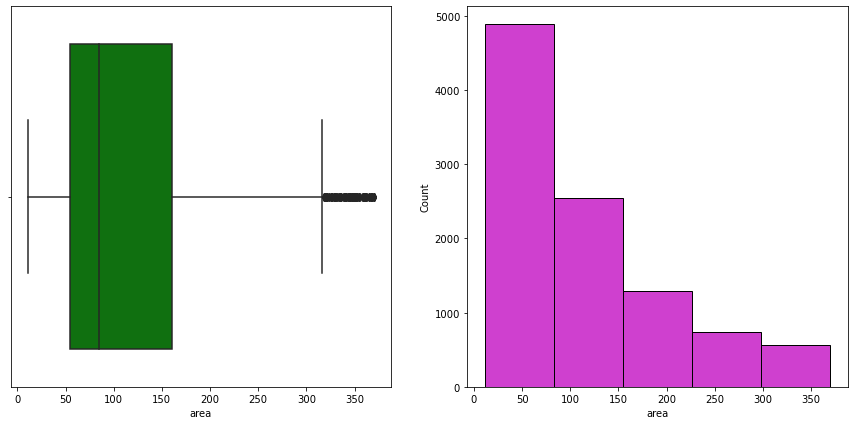

In [30]:
# distribution of area
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=df1["area"],ax=ax[1],color="m",bins=5)
sns.boxplot(x=df1["area"],ax=ax[0],color="g")
plt.show()

Maximum no of properties have area between 10 to 150

In [31]:
b=df1[(df1["rent amount (R$)"]<-3675.0)|(df1["rent amount (R$)"]>10205.0)]
df1=df1.drop(b.index,axis=0,errors="ignore")

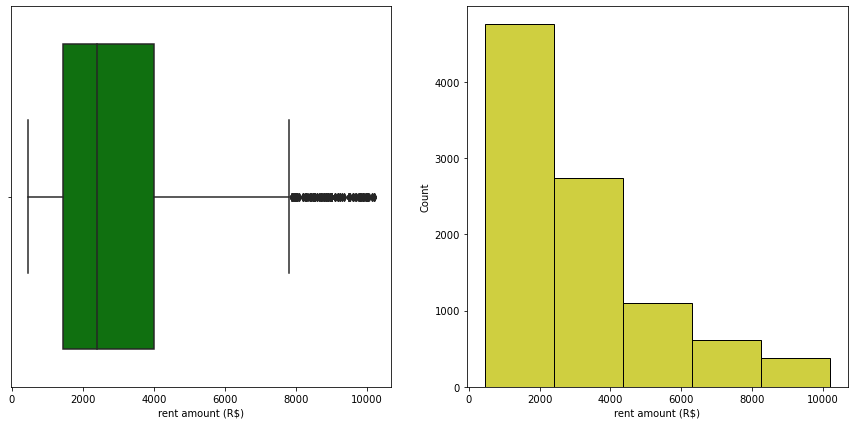

In [32]:

fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=df1["rent amount (R$)"],ax=ax[1],color="y",bins=5)
sns.boxplot(x=df1["rent amount (R$)"],ax=ax[0],color="g")
plt.show()

Most of the properties have rent amount between 200 to 4000 (R$)

In [33]:
c=df1[(df1["property tax (R$)"]<-467.5)|(df1["property tax (R$)"]>880.5)]
df1=df1.drop(c.index,axis=0,errors="ignore")

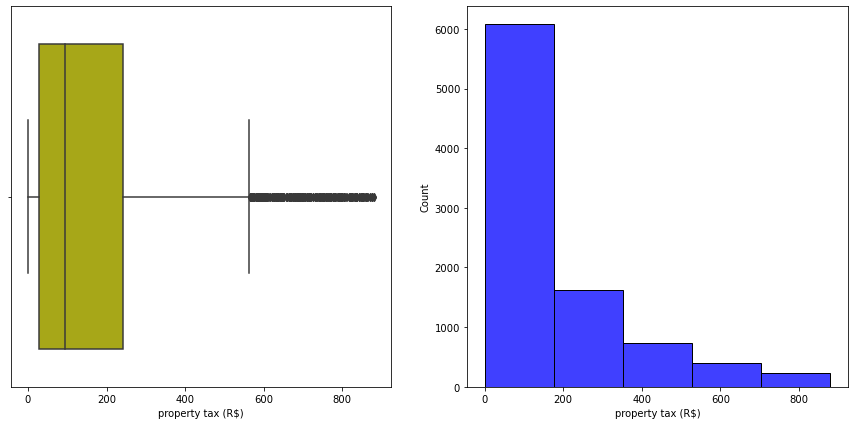

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=df1["property tax (R$)"],ax=ax[1],color="b",bins=5)
sns.boxplot(x=df1["property tax (R$)"],ax=ax[0],color="y")
plt.show()

Most of the properties have property tax between 0 to 200 (R$) 

In [35]:
d=df1[(df1["total (R$)"]<-4997.625)|(df1["total (R$)"]>13827.375)]
df1=df1.drop(d.index,axis=0,errors="ignore")

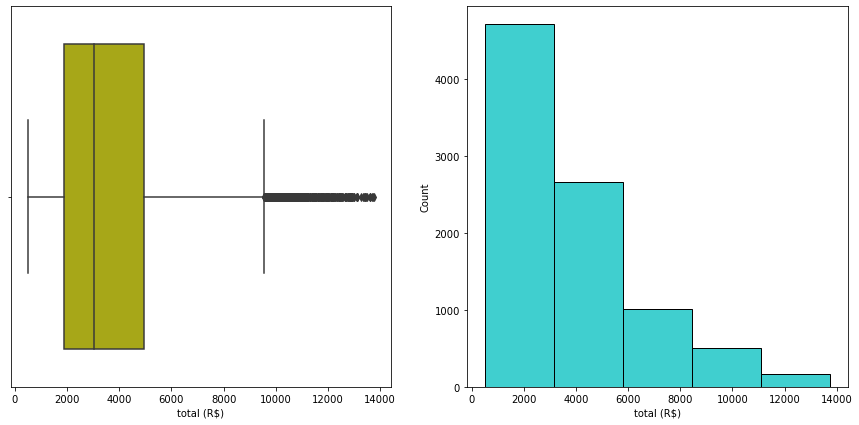

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=df1["total (R$)"],ax=ax[1],color="c",bins=5)
sns.boxplot(x=df1["total (R$)"],ax=ax[0],color="y")
plt.show()

 total rent for most of the properties is between 1500 to 6000 (R$)

# Level 2 Analysis (Bivariate analysis)

Cat-Cat

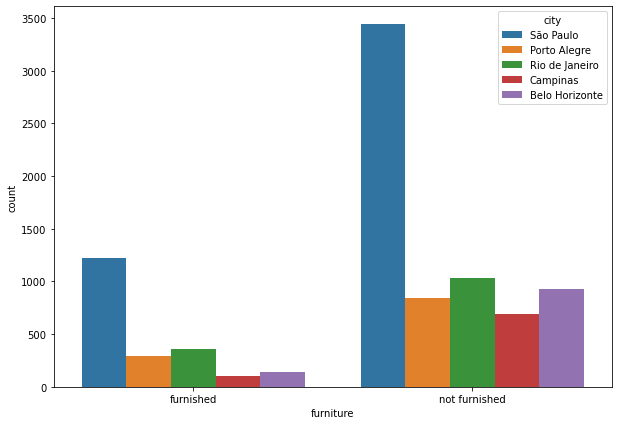

In [37]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x="furniture",hue="city",data=df1)
plt.show()

No of not furnished properties are relatively more than the the furnished properties Also most of the furnished and not furnished properties are in the city of Sao Paulo as the no of properties in this city is 55 % 

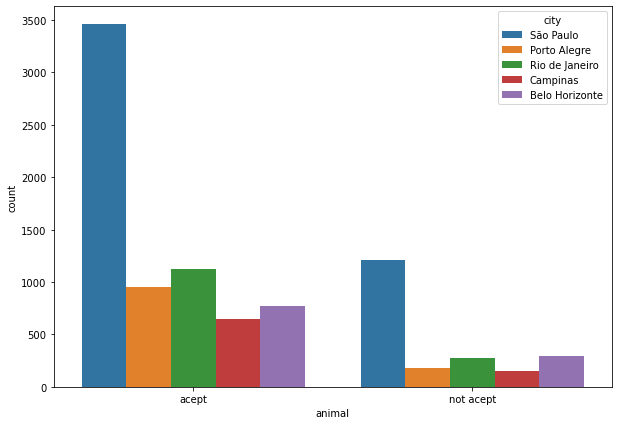

In [38]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x="animal",hue="city",data=df1)
plt.show()

No of animal accepeting properties are relatively more than the the animal not accepting properties Also most of the animal accepting and not accepting properties are in the city of Sao Paulo as the no of properties in this city is 55 %
But by the graph,no of animal not accepting properties in other cities is also very less.

Cat- num

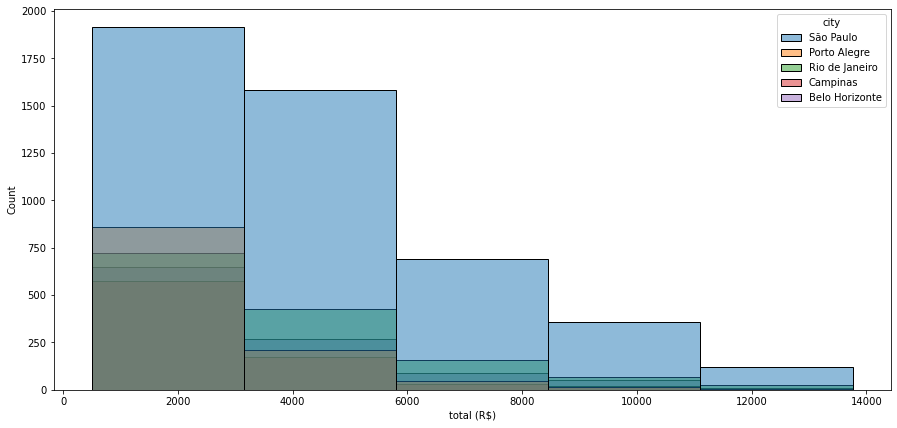

In [39]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["total (R$)"],hue=df["city"],ax=ax,bins=5)
plt.show()

Max no of properties are in city  sao paulo with min total rest (within 2000(R$))

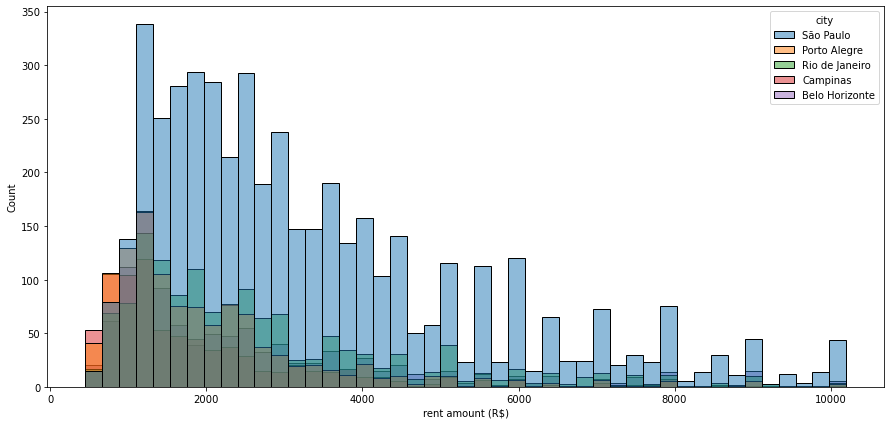

In [40]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["rent amount (R$)"],hue=df["city"],ax=ax)
plt.show()

max properties are  in city sao paulo  with min rent 2000  to 4000

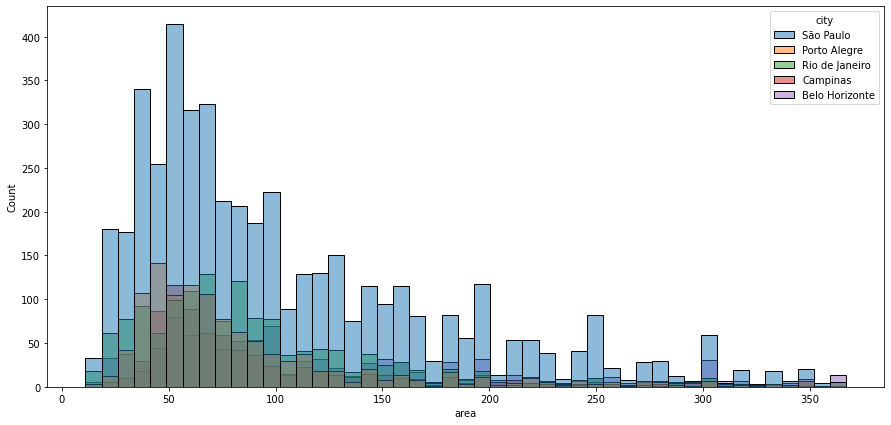

In [41]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["area"],hue=df["city"],ax=ax)
plt.show()

the max no of properties in city sao paulo have the area below 150

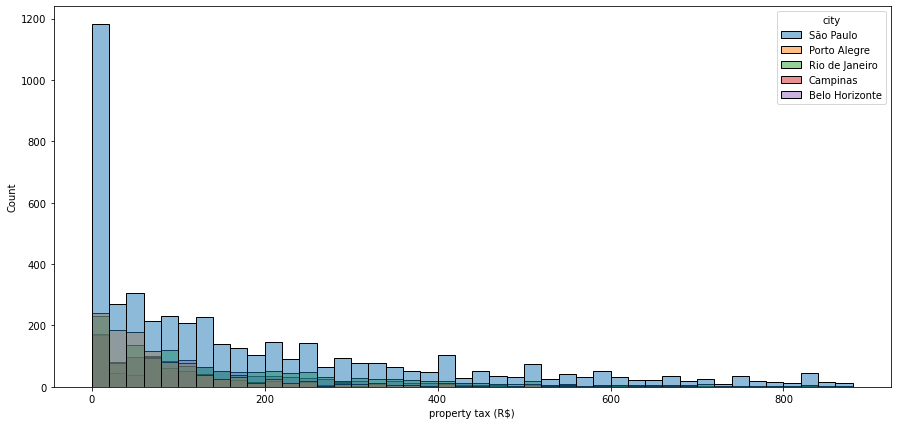

In [42]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(x=df1["property tax (R$)"],hue=df["city"],ax=ax)
plt.show()

the property tax is min for most of the properties in the city of sao paulo

# Level 3 Analysis (Multivariate analysis)

In [ ]:
df1=df1.loc[(df1.city=="São Paulo")]
sns.catplot(x="total (R$)",y="area",data=df2,ci=None,kind='bar',)
plt.show()

area above 150

In [ ]:
df3=df1[(df1["area"]>150)|(df1["total (R$)"]<5000)|(df1["property tax (R$)"]<200)|(df1["rent amount (R$)"]<4000)]
df3